In [145]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display
%matplotlib inline

In [151]:
# Load and resample to 16k
wav = librosa.load('C:/SimonU/LJ028-0224.wav', sr=22050)
wav_rs = librosa.core.resample(wav[0], orig_sr=22050, target_sr=16000)

# Short Time Fourier Transform for Original and for resampled version
orig_stft = librosa.stft(wav[0], n_fft=8192, hop_length=6144)
rs_stft = librosa.stft(wav_rs, n_fft=2048, hop_length=1024)

# Back to Wave form
wav_orig = librosa.istft(orig_stft, hop_length=6144)
wav_rec = librosa.istft(rs_stft, hop_length=1024)

In [155]:
print('Original')
IPython.display.Audio(data=wav[0], rate=22050)

Original


In [157]:
print('Wave to Spectogram then back to wave with 16k SamplingRate')
IPython.display.Audio(data=wav_rec, rate=16000)

Wave to Spectogram then back to wave with 16k SamplingRate


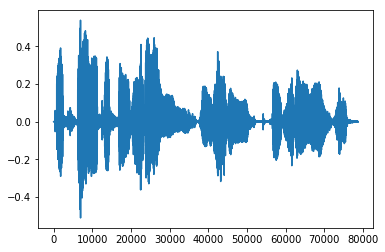

In [158]:
plt.plot(wav[0]);

In [99]:
# Create Mel Filterbank and inverse
mel_base = librosa.filters.mel(sr=16000, n_fft=2048, n_mels=64)
mel_base_inv = np.linalg.pinv(mel_base)
print(mel_base.shape)

(64, 1025)


In [133]:
# Convert to mel scale
mel_rs = mel_base@rs_stft

C:\Users\Simon\Anaconda3\lib\site-packages\librosa\display.py:657: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


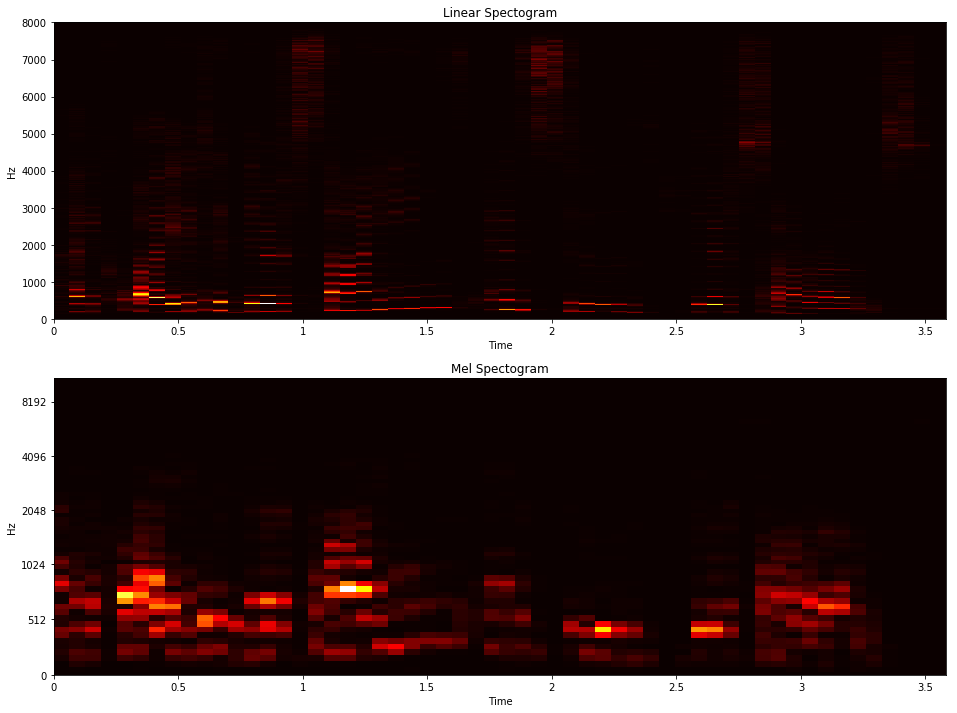

In [161]:
plt.figure(figsize=(16,12));
plt.subplot(2,1,1)
librosa.display.specshow((rs_stft), sr=16000, hop_length=1024, x_axis='time',y_axis='hz',cmap='hot');
plt.title('Linear Spectogram');

plt.subplot(2,1,2)
librosa.display.specshow(mel_rs, sr=16000, hop_length=1024, x_axis='time',y_axis='mel',cmap='hot');
plt.title('Mel Spectogram');


In [163]:
# Reconstruct original from mel
orig = mel_base_inv@mel_rs
wav_rec2 = librosa.istft(orig, hop_length=1024)
IPython.display.Audio(data=wav_rec2, rate=16000)

In [181]:
np.set_printoptions(precision=0, suppress=True, threshold=2000)

display(np.real(orig[:, 1]*100000))
print(np.real(rs_stft[:,1]*100000))

array([    -0.,     52.,    103.,    155.,    207.,    258.,    291.,
           26.,   -239.,   -505.,   -770.,  -1035.,  -1146.,   -124.,
          898.,   1920.,   2942.,   3964.,   4494.,   2786.,   1077.,
         -632.,  -2340.,  -4049.,  -5119.,  -4169.,  -3219.,  -2268.,
        -1318.,   -368.,    340.,    482.,    625.,    768.,    910.,
         1053.,   1082.,    908.,    734.,    560.,    387.,    213.,
         -221.,  -1012.,  -1803.,  -2595.,  -3386.,  -4177.,  -3433.,
        -1028.,   1377.,   3782.,   6187.,   8592.,   8295.,   5699.,
         3104.,    509.,  -2087.,  -4682.,  -4936.,  -3632.,  -2329.,
        -1025.,    278.,   1581.,    634.,  -1470.,  -3574.,  -5679.,
        -7783.,  -9887.,  -4951.,   2712.,  10375.,  18039.,  25702.,
        33365.,  24280.,  10492.,  -3296., -17084., -30872., -44660.,
       -36078., -23262., -10445.,   2371.,  15188.,  28004.,  21675.,
        13239.,   4803.,  -3633., -12069., -20505., -14469.,  -7844.,
        -1220.,   54

[    4188.    -4230.     2309.     1316.    -2808.      366.     3798.
    -1035.    -7388.     6703.      756.    -4934.     6899.    -4631.
    -2375.    21553.   -30667.     4364.     6581.    -3080.    -4222.
    21368.    29445.     3020.  -153658.   273801.  -697236.  1032190.
  -402749.  -320304.   205835.   -17030.    44130.    69980.   -60272.
   -70684.    63235.    44102.  -157615.   123724.    -1896.   -27372.
    12534.    34409.   -49630.    13714.   -73992.    73948.   -25146.
   -89897.   428591.  -419904.   492878. -1598507.  1944463.  -325330.
  -815149.   386383.    56355.  -104590.   130412.   -41990.   -42085.
   -12223.    46461.    16473.   -38790.   -18471.    24745.    21589.
   -54068.    36743.    48517.   -62847.    12382.    12594.  -319646.
  1197017. -2532591.  3364579. -2426278.    39117.  1733390. -1353136.
    -3512.   480872.  -264239.    90097.    81098.  -218197.    94532.
   157871.  -227930.    42336.   199288.  -270543.    98526.   236134.
  -498

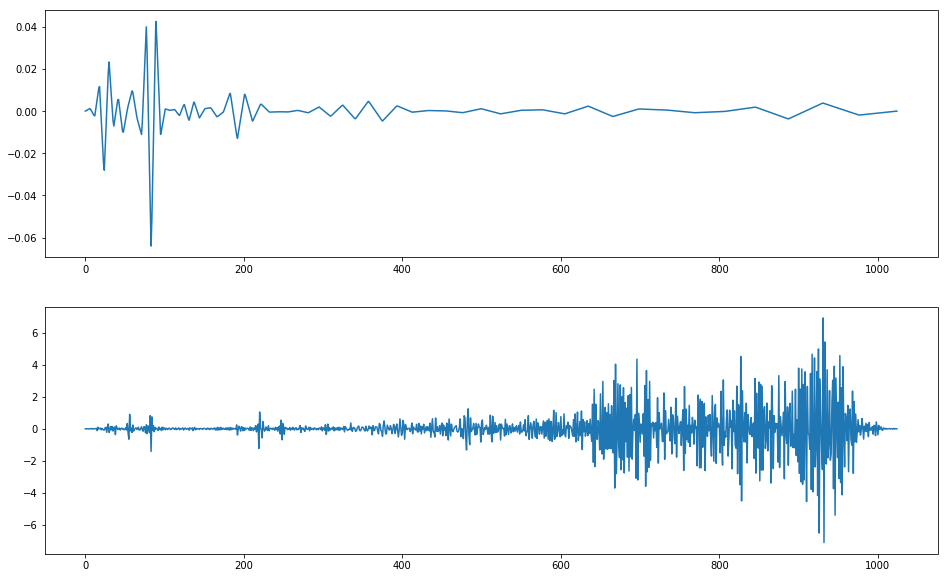

In [196]:
plt.figure(figsize=(16, 10))
plt.subplot(2,1,1)
plt.plot(list(range(1025)), np.real(orig[:, 15]));
plt.subplot(2,1,2)
plt.plot(list(range(1025)), np.real(rs_stft[:, 15]));

C:\Users\Simon\Anaconda3\lib\site-packages\librosa\display.py:657: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


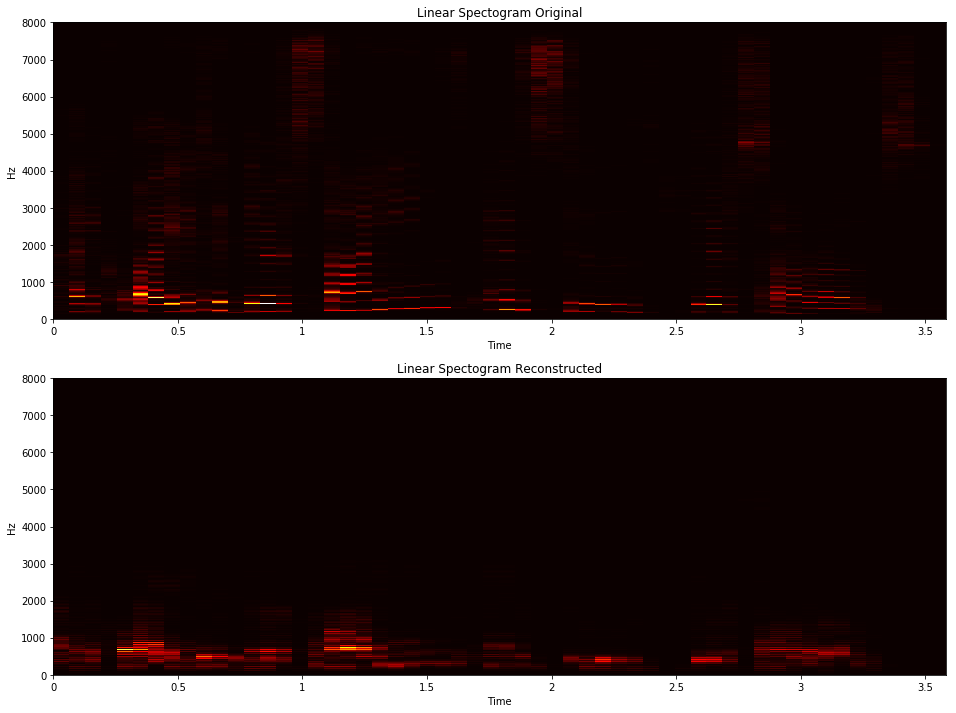

In [164]:
plt.figure(figsize=(16,12));
plt.subplot(2,1,1)
librosa.display.specshow((rs_stft), sr=16000, hop_length=1024, x_axis='time',y_axis='hz',cmap='hot');
plt.title('Linear Spectogram Original');

plt.subplot(2,1,2)
librosa.display.specshow(orig, sr=16000, hop_length=1024, x_axis='time',y_axis='hz',cmap='hot');
plt.title('Linear Spectogram Reconstructed');
